# Pandas — Part 1

In this lesson, we're going to introduce some of the basics of [pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html), a powerful Python library for working with tabular data like CSV files.

We've already used pandas a little in some of our previous lessons. Time to stop deferring learning it!

We will cover how to:

* Import pandas
* Read in a CSV file
* Explore and filter data
* Make simple plots and data visualizations
* Write a CSV file

## Import Dataset

The dataset that we're working with in this lesson comes from the [Yelp Open Dataset](https://www.yelp.com/dataset). The original dataset is pretty big, and consists of a series of related .json files. I've modified the dataset to include only restaurant reviews. I've also merged two of the .json files provided by Yelp so that each review is also accompanied by the restaurant's categories, e.g. tacos, Japanese, pub food. Finally, I've divided the dataset into more managable chunks so that processing it is not so slow.

Let's import the first two chunks (about 5% of the total dataset) now:

In [1]:
# For downloading large files from Google Drive
import gdown

# Download the first json file, "rev0-rests.json"
gdown.download('https://drive.google.com/uc?export=download&id=1HKBHJKVNuHExhuresBlh9HmgdphaLikH', quiet=False) 

# Download the second json file, "rev1-rests.json"
gdown.download('https://drive.google.com/uc?export=download&id=12F38upGdJXCY9JNPpkO02LTPwo9dQ_Xu', quiet=False) 

Downloading...
From: https://drive.google.com/uc?export=download&id=1HKBHJKVNuHExhuresBlh9HmgdphaLikH
To: /content/rev0-rests.json
100%|██████████| 57.2M/57.2M [00:00<00:00, 151MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=12F38upGdJXCY9JNPpkO02LTPwo9dQ_Xu
To: /content/rev1-rests.json
100%|██████████| 57.4M/57.4M [00:00<00:00, 108MB/s] 


'rev1-rests.json'

## Import Pandas

To use the pandas library, we also need to import it.

In [3]:
import pandas as pd

The above `import` statement not only imports the pandas library but also gives it an alias or nickname — `pd`. This alias will save us from having to type out the entire words `pandas` each time we need to use it. Many Python libraries have commonly used aliases like `pd`.

## Set Display Settings

By default, Pandas will display 60 rows and 20 columns. I often change [pandas' default display settings](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html) to show more rows or columns.

In [4]:
pd.options.display.max_rows = 100

## Read in JSON File

To read in a JSON file, we will use the function `pd.read_json()` and insert the name of our desired file path. 

In [5]:
rev0_df = pd.read_json('rev0-rests.json')

rev0_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,categories
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,"Restaurants, Breakfast & Brunch, Food, Juice B..."
1,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,"Restaurants, Breakfast & Brunch"
2,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,"Halal, Pakistani, Restaurants, Indian"
3,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ..."
4,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31,"Mediterranean, Restaurants, Seafood, Greek"
...,...,...,...,...,...,...,...,...,...,...
72119,q7C0jXHdey6HeplnuK7HQg,CmWitqya9LD6w8gBvBaDCw,JOvNunKJlWhwJRwLmUR9ZA,4,0,0,0,We liked everything about Tryst. Love the out-...,2017-05-30 01:43:24,"Bars, Beer, Wine & Spirits, Restaurants, Loung..."
72120,WfFp7POMpxbzzAGCCYwTWQ,x_mCS124Gjg9kN7s7A44tg,VOEN8f9WEysinBsLqbiVqg,2,0,0,0,I had a late lunch with 13 senior citizens for...,2015-12-16 22:24:57,"Venues & Event Spaces, Italian, Event Planning..."
72121,pAEbIxvr6ebx2bHc1XvguA,SMH5CeiLvKx61lKwtLZ_PA,lV0k3BnslFRkuWD_kbKd0Q,4,0,0,0,Came here for lunch with a group. They were bu...,2018-05-30 22:28:56,"American (Traditional), Breakfast & Brunch, Re..."
72122,GatIbXTz-WDru5emONUSIg,MRrN6DH3QGCFcDv5RENYVg,C4lZdhasjZVQyDlOiXY1sA,4,0,0,0,This is one of my favorite Mexican restaurants...,2016-06-04 00:59:15,"Mexican, Restaurants"


This creates a pandas [DataFrame object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe) — often abbreviated as *df*, e.g., *rev0_df*. A DataFrame looks and acts a lot like a spreadsheet. But it has special powers and functions that we will discuss in the next few lessons.

*Note: When reading in a csv file, the syntax is mostly the same, except we also specify a `delimiter`. The `delimiter` specifies the character that separates or "delimits" the columns in our dataset. For CSV files, the delimiter will most often be a comma. (CSV is short for *Comma Separated Values*.) Sometimes, however, the delimiter of a CSV file might be a tab (`/t`) or, more rarely, another character. Here is an example for reference:*

`myfile_df = pd.read_csv('myfile.csv', delimiter=",", parse_dates=['date'])`

*Another note: Dates included in .JSON files are parsed into the pandas data object automatically, but dates included in CSVs are not. For this reason, if you have a column(s) with dates in your csv, you also need to include the `parse_dates` parameter and specify which column contains date information (e.g. 'date').*

## Display Data

We can display a DataFrame in a Jupyter notebook simply by running a cell with the variable name of the DataFrame.

In [6]:
rev0_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,categories
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,"Restaurants, Breakfast & Brunch, Food, Juice B..."
1,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,"Restaurants, Breakfast & Brunch"
2,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,"Halal, Pakistani, Restaurants, Indian"
3,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ..."
4,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31,"Mediterranean, Restaurants, Seafood, Greek"
...,...,...,...,...,...,...,...,...,...,...
72119,q7C0jXHdey6HeplnuK7HQg,CmWitqya9LD6w8gBvBaDCw,JOvNunKJlWhwJRwLmUR9ZA,4,0,0,0,We liked everything about Tryst. Love the out-...,2017-05-30 01:43:24,"Bars, Beer, Wine & Spirits, Restaurants, Loung..."
72120,WfFp7POMpxbzzAGCCYwTWQ,x_mCS124Gjg9kN7s7A44tg,VOEN8f9WEysinBsLqbiVqg,2,0,0,0,I had a late lunch with 13 senior citizens for...,2015-12-16 22:24:57,"Venues & Event Spaces, Italian, Event Planning..."
72121,pAEbIxvr6ebx2bHc1XvguA,SMH5CeiLvKx61lKwtLZ_PA,lV0k3BnslFRkuWD_kbKd0Q,4,0,0,0,Came here for lunch with a group. They were bu...,2018-05-30 22:28:56,"American (Traditional), Breakfast & Brunch, Re..."
72122,GatIbXTz-WDru5emONUSIg,MRrN6DH3QGCFcDv5RENYVg,C4lZdhasjZVQyDlOiXY1sA,4,0,0,0,This is one of my favorite Mexican restaurants...,2016-06-04 00:59:15,"Mexican, Restaurants"


There are a few important things to note about the DataFrame displayed here:

* Index
    * The ascending numbers in the very left-hand column of the DataFrame is called the pandas *Index*. You can select rows based on the Index.
    * By default, the Index is a sequence of numbers starting with zero. But you can change the Index to something else, such as one of the columns in your dataset.

* Truncation
    * The DataFrame is truncated, signaled by the ellipses in the middle `...` of every column.
    * The DataFrame is truncated because we set our default display settings to 100 rows. Anything more than 100 rows will be truncated. To display all the rows, we would need to alter pandas' default display settings again.

* Rows x Columns
    * Pandas reports how many rows and columns are in this dataset at the bottom of the output (72124 x 10 columns).
    * This is very useful!

### Shape

To explicitly check for how many rows vs columns make up a dataset, we can use the `.shape` method.

In [7]:
rev0_df.shape

(72124, 10)

### Display First *n* Rows

To look at the first *n* rows in a DataFrame, we can use a method called `.head()`.

In [ ]:
rev0_df.head(2)

In [ ]:
rev0_df.head(10)

### Display Random Sample

To look at a random sample of rows, we can use the `.sample()` method.

In [8]:
rev0_df.sample(10)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,categories
36614,TM-4Aij7Lij4ET7-r3Xz9g,jqCckgNrTiC-FPZTfN2Tmw,hYonVJe6xzVBHHT2FLo4zg,4,0,0,0,"Excellent pizza and very good service, but whe...",2014-05-26 19:16:16,"Restaurants, Caterers, Italian, Hot Dogs, Pizz..."
10209,kGzC7uEBG0YjagtbTqgeww,dkbQlubQKdmjinjyUpjynw,Xjal8g4PsYinAfeQ8RWf4Q,5,0,0,0,Very very good...\nI liked the caterpillar mar...,2018-07-08 00:24:09,"Chinese, Restaurants, Asian Fusion, Japanese, ..."
48036,yOD5YjMHHrNlW1m9Yk6Xbw,MI1UMFP4DfnSGOTAXcTF9g,TfcpJBiFNnDaochnmp4M2Q,5,2,0,0,My wife and I stopped in for brunch today and ...,2013-08-05 02:10:14,"Cafes, Restaurants, American (Traditional), Br..."
7117,on_dD5aLRGEu3Xdu8sG-kQ,efTAiTPVY0zCSsUh_RODSA,7A-q7-bajt0NxMy36dUfIw,5,0,0,0,My wife and I have been coming here with our s...,2016-08-13 14:31:00,"Restaurants, Food, Breakfast & Brunch, Vegetar..."
71980,u59euv8dwwz7LFhCbGxjsA,TB-ihR_wNRzh6yz83TQbmg,G1fQJ8k5U1gdX0vWODCZYA,4,2,1,0,This place makes some damn good Italian food f...,2012-12-09 15:47:26,"Pizza, Restaurants, Italian, American (Traditi..."
46342,NMBcpvb0KcJDiKOnLYwZUw,Tz9B1_vO_-ccFWMAJGVkkg,KhBUg5QhBYuK8RZAe5gDMQ,4,0,0,0,"I love the independent, but was so saddened wh...",2018-09-14 20:28:55,"Restaurants, Nightlife, Pubs, Food, Bars, Amer..."
64534,C-9H_lRtOpWjUFAhQVhhJA,oxRYkMeqQ1n1NUKOb4F_Ug,G3u9BQ7cc-IcXOfNyFKmnw,1,0,0,0,My wife and I never had a chance to taste the ...,2015-11-22 16:12:41,"Restaurants, Sushi Bars"
1085,nRW-tnKDxj-bZdxxaJxcVg,mukbs7Bj65O2fIVMi935nA,u7_3L1NBWgxhBM_B-cmmnA,5,0,0,0,"Philadelphia, I love you. Places like this re...",2014-05-26 22:20:26,"Italian, Pizza, Restaurants, Salad"
54014,XNY0aWr7i-jAQD1VBajFKw,VhswHpJuGQsraKkNgp26qg,f4PA-f1tcN1bIpZJLdFsQQ,4,0,0,0,"This is an amazing buffet. Really good food, ...",2017-12-19 16:18:12,"Nightlife, Venues & Event Spaces, Indian, Bars..."
47808,9cT-EcHmXDEJD5OEpTvICA,7dvN1NwUk_CI9Mff3D-DeQ,gCcJTKC40CL0XtYYGfcXDw,5,0,0,0,Great sandwiches for cheaper than average pric...,2014-08-13 18:14:58,"Juice Bars & Smoothies, Food, Mediterranean, G..."



## Data Types

Just like Python has different data types, Pandas has different data types, too. These data types are automatically assigned to columns when we read in a CSV file. We can check these Pandas data types with the [`.dtypes` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html).



| **Pandas Data Type** |  **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| `object`         | string                                                                               |
| `float64`         | float                                               |
| `int64`       | integer                                                        |
| `datetime64`       |  date time              

In [ ]:
rev0_df.dtypes

It's important to always check the data types in your DataFrame. For example, sometimes numeric values will accidentally be interpreted as a string object. To perform calculations on this data, you would need to first convert that column from a string to an integer.

## Columns

We can also check the column names of the DataFrame with [`.columns`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html)

In [9]:
rev0_df.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date', 'categories'],
      dtype='object')



## Calculate Summary Statistics

To calculate summary statistics for every column in our DataFrame, we can use the `.describe()` method.

In [10]:
rev0_df.describe()

,stars,useful,funny,cool
count,72124.000000,72124.000000,72124.000000,72124.000000
mean,3.810840,0.759082,0.234014,0.323443
std,1.323342,1.609689,0.893915,1.023690
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000
max,5.000000,48.000000,38.000000,49.000000


By default, `.describe()` will only compute columns with numerical data. To include all columns, we can use `include='all`.

In [11]:
rev0_df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,categories
count,72124,72124,72124,72124.000000,72124.000000,72124.000000,72124.000000,72124,72124,72124
unique,72124,59366,4132,NaN,NaN,NaN,NaN,72097,72072,3044
top,KU_O5udG6zpxOg-VcAEodg,_BcWyKQL16ndpBdggh2kNA,GBTPC53ZrG1ZBY3DT8Mbcw,NaN,NaN,NaN,NaN,Made a reservation last week for a party of 30...,2016-05-08 21:05:44,"German, Restaurants, Seafood, Cocktail Bars, F..."
freq,1,33,950,NaN,NaN,NaN,NaN,2,2,950
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-03-01 17:47:15,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-04 18:20:00,NaN
mean,NaN,NaN,NaN,3.810840,0.759082,0.234014,0.323443,NaN,NaN,NaN
std,NaN,NaN,NaN,1.323342,1.609689,0.893915,1.023690,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN


The only field that might not be immediately intuititve is `freq`, which describes the most common value's frequency. 

Note: `NaN` is the pandas value both for data that is "Not a Number" and for data that is entirely missing. We'll come back to that in a minute. For now, though, let's take a deeper dive into these summary statistics.

**What can we glean from them?**

### .isna() / .notna()

Pandas has special ways of dealing with missing data. As you may have already noticed, blank rows in a CSV file show up as `NaN` in a Pandas DataFrame.

To filter and count the number of missing/not missing values in a dataset, we can use the special `.isna()` and `.notna()` methods on a DataFrame or Series object.

In [12]:
rev0_df['text'].notna()

0        True
1        True
2        True
3        True
4        True
         ... 
72119    True
72120    True
72121    True
72122    True
72123    True
Name: text, Length: 72124, dtype: bool

The `.isna()` and `.notna()` methods return True/False pairs for each row, which we can use to filter the DataFrame for any rows that have information in a given column. For example, we can filter the DataFrame for only rows that have a review. 

In [ ]:
rev0_df[rev0_df['text'].notna()]

It turns out that all entries have reviews, but if we needed to, we could explicitly count the number of blank entries using the `.value_counts()` method:

In [ ]:
rev0_df['text'].isna().value_counts()

### Value Counts

In general, `.value_counts()` is a helpful feature:

In [13]:
rev0_df['stars'].value_counts()

5    29709
4    19787
3     9092
1     7188
2     6348
Name: stars, dtype: int64

To quickly transform these numbers into percentages, we can set the `normalize=` parameter to True:

In [14]:
rev0_df['stars'].value_counts(normalize=True)

5    0.411916
4    0.274347
3    0.126061
1    0.099662
2    0.088015
Name: stars, dtype: float64

To select the top 3 most frequent values in the "stars" column, we can combine `value_counts()` with regular Python list slicing.

In [15]:
rev0_df['stars'].value_counts()[:3]

5    29709
4    19787
3     9092
Name: stars, dtype: int64

This is perhaps more illumainating with columns with unknown frequencies of values:

In [16]:
rev0_df['categories'].value_counts()[:10]

German, Restaurants, Seafood, Cocktail Bars, French, Brasseries, American (New), Nightlife, Bars, Cajun/Creole, Breakfast & Brunch    950
Mexican, Restaurants                                                                                                                  746
Restaurants, Mexican                                                                                                                  630
Restaurants, Italian                                                                                                                  511
Restaurants, Pizza                                                                                                                    499
Cajun/Creole, Restaurants                                                                                                             473
Bars, Breakfast & Brunch, Restaurants, Barbeque, Cajun/Creole, Cafes, Cocktail Bars, Nightlife                                        433
Vegetarian, Restaurants, Breakfast

### .count()

Because the `.count()` method always excludes NaN values, we can also count the number of values in each column and divide by the total number of rows in each column (`len()`) to find the percentage of not blank data in every column.

In [ ]:
rev0_df.count() / len(rev0_df)

100% of all columns have values. Terrific! 

### .fillna()

If we needed to, we could fill the `NaN` values in the DataFrame with a different value by using the `.fillna()` method:

In [ ]:
rev0_df['text'].fillna('No review provided.')

### Rename Columns

We can rename columns with the .rename() method and the columns= parameter:

In [17]:
rev0_df.rename(columns={'text': 'review'})

,review_id,user_id,business_id,stars,useful,funny,cool,review,date,categories
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,"Restaurants, Breakfast & Brunch, Food, Juice B..."
1,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,"Restaurants, Breakfast & Brunch"
2,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,"Halal, Pakistani, Restaurants, Indian"
3,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ..."
4,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31,"Mediterranean, Restaurants, Seafood, Greek"
...,...,...,...,...,...,...,...,...,...,...
72119,q7C0jXHdey6HeplnuK7HQg,CmWitqya9LD6w8gBvBaDCw,JOvNunKJlWhwJRwLmUR9ZA,4,0,0,0,We liked everything about Tryst. Love the out-...,2017-05-30 01:43:24,"Bars, Beer, Wine & Spirits, Restaurants, Loung..."
72120,WfFp7POMpxbzzAGCCYwTWQ,x_mCS124Gjg9kN7s7A44tg,VOEN8f9WEysinBsLqbiVqg,2,0,0,0,I had a late lunch with 13 senior citizens for...,2015-12-16 22:24:57,"Venues & Event Spaces, Italian, Event Planning..."
72121,pAEbIxvr6ebx2bHc1XvguA,SMH5CeiLvKx61lKwtLZ_PA,lV0k3BnslFRkuWD_kbKd0Q,4,0,0,0,Came here for lunch with a group. They were bu...,2018-05-30 22:28:56,"American (Traditional), Breakfast & Brunch, Re..."
72122,GatIbXTz-WDru5emONUSIg,MRrN6DH3QGCFcDv5RENYVg,C4lZdhasjZVQyDlOiXY1sA,4,0,0,0,This is one of my favorite Mexican restaurants...,2016-06-04 00:59:15,"Mexican, Restaurants"


Renaming a column's label as above will only momentarily change that column's name, however. If we display our DataFrame, we will see that the column name has not changed permamently:

In [ ]:
rev0_df.head(1)

To save changes in the DataFrame, we need to reassign the DataFrame to the same variable.

In [ ]:
rev0_df = rev0_df.rename(columns={'text': 'review'})

## Select Columns

We've already done this, but so that it's made explicit, to select a column from the DataFrame, we type the name of the DataFrame followed by square brackets and a column name in quotations marks.

In [19]:
rev0_df['text']

0        If you decide to eat here, just be aware it is...
1        Family diner. Had the buffet. Eclectic assortm...
2        Wow!  Yummy, different,  delicious.   Our favo...
3        Cute interior and owner (?) gave us tour of up...
4        I am a long term frequent customer of this est...
                               ...                        
72119    We liked everything about Tryst. Love the out-...
72120    I had a late lunch with 13 senior citizens for...
72121    Came here for lunch with a group. They were bu...
72122    This is one of my favorite Mexican restaurants...
72123    Came here for brunch - had an omlette ($19 + t...
Name: text, Length: 72124, dtype: object

**How would you create a random sample of 10 reviews?**

Note that selecting Pandas columns is very similar to the way we access a value in a Python dictionary by putting the key in square brackets.  

```
#Dictionary
review = {"business_id": "1234567",
             "stars": 3,
             "text": "good plce!"}

#Key            ->    Value
review['stars'] —> 3
```

Technically, however, a single column in a DataFrame is not a dictionary but a [*Series* object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dsintro).

In [21]:
type(rev0_df['text'])

pandas.core.series.Series

A Series object displays differently than a DataFrame object. To select a column as a DataFrame and not as a Series object, we will use two square brackets.

This is helpful if you want to create a smaller DataFrame that you can then manipulate further.

In [ ]:
rev0_df[['review']]

In [ ]:
type(rev0_df[['review']])

By using two square brackets, we can also select multiple columns at the same time.

In [23]:
rev0_df[['stars', 'text', 'categories']]

,stars,text,categories
0,3,"If you decide to eat here, just be aware it is...","Restaurants, Breakfast & Brunch, Food, Juice B..."
1,3,Family diner. Had the buffet. Eclectic assortm...,"Restaurants, Breakfast & Brunch"
2,5,"Wow! Yummy, different, delicious. Our favo...","Halal, Pakistani, Restaurants, Indian"
3,4,Cute interior and owner (?) gave us tour of up...,"Sandwiches, Beer, Wine & Spirits, Bars, Food, ..."
4,1,I am a long term frequent customer of this est...,"Mediterranean, Restaurants, Seafood, Greek"
...,...,...,...
72119,4,We liked everything about Tryst. Love the out-...,"Bars, Beer, Wine & Spirits, Restaurants, Loung..."
72120,2,I had a late lunch with 13 senior citizens for...,"Venues & Event Spaces, Italian, Event Planning..."
72121,4,Came here for lunch with a group. They were bu...,"American (Traditional), Breakfast & Brunch, Re..."
72122,4,This is one of my favorite Mexican restaurants...,"Mexican, Restaurants"


See what happens if we try to select multiple columns as a Series...

In [ ]:
rev0_df['stars', 'review', 'categories']

## Make Plots

Pandas makes it easy to create plots and data visualizations. We can make a simple plot by adding `.plot()` to any DataFrame or Series object that has appropriate numeric data.

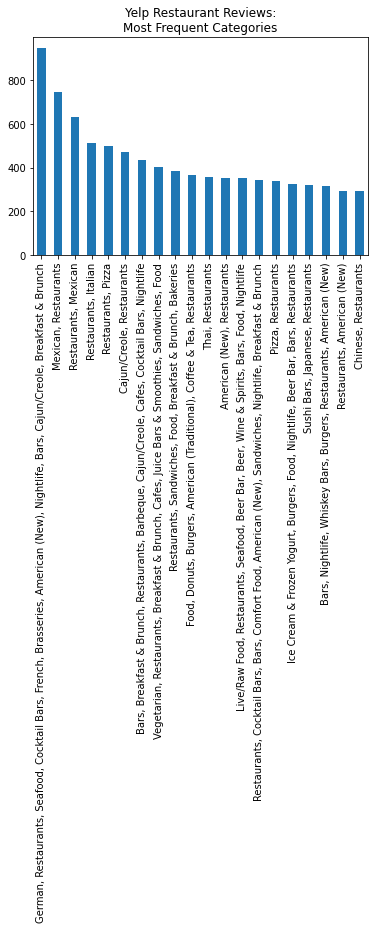

In [24]:
rev0_df['categories'].value_counts()[:20].plot(kind='bar', title='Yelp Restaurant Reviews:\nMost Frequent Categories')

 We specify the title with the `title=` parameter and the kind of plot by altering the `kind=` parameter:
* ‘bar’ or ‘barh’ for bar plots

* ‘hist’ for histogram

* ‘box’ for boxplot

* ‘kde’ or ‘density’ for density plots

* ‘area’ for area plots

* ‘scatter’ for scatter plots

* ‘hexbin’ for hexagonal bin plots

* ‘pie’ for pie plots
 
For example, to make a horizontal bar chart, we can set `kind='barh'`

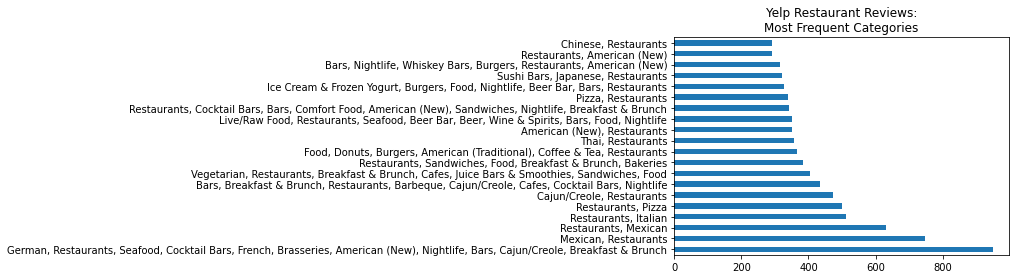

In [25]:
rev0_df['categories'].value_counts()[:20].plot(kind='barh', title='Yelp Restaurant Reviews:\nMost Frequent Categories').get_figure().savefig('Categories')

**How would you make a pie chart with these data?**

## Filter Data

We can filter a pandas DataFrame to select only certain values. Filtering data by certain values is similar to selecting columns.

We type the name of the DataFrame followed by square brackets and then, instead of inserting a column name, we insert a True/False condition. 

In [26]:
rev0_df[rev0_df['stars'] == 5]

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,categories
2,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,"Halal, Pakistani, Restaurants, Indian"
5,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16,"Beer Bar, Bars, American (New), Gastropubs, Re..."
11,OAhBYw8IQ6wlfw1owXWRWw,1C2lxzUo1Hyye4RFIXly3g,BVndHaLihEYbr76Z0CMEGw,5,0,0,0,"Great place for breakfast! I had the waffle, w...",2014-10-11 16:22:06,"Sandwiches, Restaurants, American (New), Ameri..."
12,oyaMhzBSwfGgemSGuZCdwQ,Dd1jQj7S-BFGqRbApFzCFw,YtSqYv1Q_pOltsVPSx54SA,5,0,0,0,Tremendous service (Big shout out to Douglas) ...,2013-06-24 11:21:25,"Wine Bars, Restaurants, Nightlife, Steakhouses..."
14,Xs8Z8lmKkosqW5mw_sVAoA,IQsF3Rc6IgCzjVV9DE8KXg,eFvzHawVJofxSnD7TgbZtg,5,0,0,0,My absolute favorite cafe in the city. Their b...,2014-11-12 15:30:27,"Food, Cafes, Coffee & Tea, Restaurants"
...,...,...,...,...,...,...,...,...,...,...
72108,89v9Ic1EYzunPCWOr_lqjg,WRGJX46lHlSxrVCA0iWNnw,6kAXOzE7fqaBZINQV_-_mg,5,1,1,2,is it poor form to update my update? but i mus...,2011-09-11 20:16:33,"Vietnamese, Restaurants"
72109,zAIQeF9VYht9DguOo20Rjw,ORjEowtmA9Ws3fYTIjgd5w,mVMR2nvy96Jrl0Aqa8NeBg,5,2,0,0,The best food truck in Tampa. Management is ex...,2014-05-18 22:53:58,"Puerto Rican, Food, Street Vendors, Food Truck..."
72110,FJYLxyVG6F6dzCzUn5fKiw,9kbV0gn3Ea2eAMV-Z_eX8Q,lV0k3BnslFRkuWD_kbKd0Q,5,1,0,1,LOVE Metro Diner. The staff and the food..the ...,2017-10-19 15:39:00,"American (Traditional), Breakfast & Brunch, Re..."
72113,EKmMMoMzz72g82RAh-XFxw,BMaYU6a3_Yc28a7hQnuiNA,0qu0fNTOsSmuREYVIMPuIQ,5,0,0,0,Excellent sandwiches and excellent food. Great...,2014-06-06 03:40:51,"American (Traditional), Restaurants, Bars, Nig..."


It can sometimes be helpful to isolate this condition and see that it produces a long list of True/False pairs for every row.

In [ ]:
rev0_df['stars'] == 5

**What is a situation where it might be helpful to have these T/F or *Boolean* values?**

Filtering DataFrames can sometimes get confusing and unwieldy (as conditions within conditions pile up like Russian dolls). It can be helpful to make a separate variable for a filter, as below.

In [ ]:
five_star_filter = rev0_df['stars'] == 5

In [ ]:
rev0_df[five_star_filter]

In a similar vein, it's often useful to make a new variable for a filtered DataFrame. For example, let's say we wanted to look at only the five star restaurants in the dataset and see the reviews.

In [ ]:
five_star_reviews = rev0_df[five_star_filter]

five_star_reviews

**How would you get information about the top 10 categories of the five star reviews? (Hint: use value_counts)**

You can also plot these value counts as above:

In [ ]:
five_star_reviews['categories'].value_counts()[:10].plot(kind='pie', figsize=(10,10), title='Five Star Restaurants:\nMost Frequent Categories')

There's a lot we can do with filters beyond exact value matches with an equals operator `==`.

We can also incorporate `>`, `<`, `>=`, `<=` with integers, floats, and even dates. 

In [ ]:
date_filter = rev0_df['date'] >= '2018-01-01'

In [ ]:
rev0_df[date_filter]

### Concatinating two dataframes

If you have two dataframes that share many/all of the same columns, you can concatinate them as follows:

In [ ]:
# read in the files again
rev0_df = pd.read_json('rev0-rests.json')
rev1_df = pd.read_json('rev1-rests.json')

# concatinate them
more_rests_df = pd.concat([rev0_df, rev1_df], ignore_index=True, sort=False)

more_rests_df

## Manipulating Columns

### Dropping Columns 

We can remove a column from the DataFrame with the `.drop()` method and the column name.

In [ ]:
less_stuff_df = rev0_df.drop(columns=['review_id','user_id','business_id','useful','funny','cool'])

less_stuff_df

### Adding Columns

To add a column, we simply put a new column name in square brackets and set it equal to whatever we want the new column to be.

For example, if we wanted to create a new column to indicate whether a restaurant was or was not categorized as Mexican, we could do something like:

In [ ]:
more_rests_df['is_mexican'] = more_rests_df['categories'].str.contains(pat = "Mexican")

more_rests_df

**How would you make a new column for Japanese restaurants?**

### Sorting Columns

We can sort a DataFrame with the `.sort_values()` method, inside of which we include the parameter `by=` and indicate the name of the column we want to sort by (written in quotation marks).

For example, we can sort the DataFrame by the number of stars.

By default, pandas will sort in "ascending" order, from the smallest value to the largest value. If we want to sort the largest values first, we need to include another parameter `ascending=False`.


In [ ]:
more_rests_df.sort_values(by='stars', ascending=False)

If we want to sort a Series object, we don't need to use the `by=` paramter.

In [ ]:
more_rests_df['date'].sort_values(ascending=False)

### Calculations on columns

We can do different calculations on columns with built-in Pandas functions These calculations will ignore `NaN` values.

| Pandas calculations | Explanation                         |
|----------|-------------------------------------|
| `.count()`    | Number of observations    |
| `.sum()`      | Sum of values                       |
| `.mean()`     | Mean of values                      |
| `.median()`   | Median of values         |
| `.min()`      | Minimum                             |
| `.max()`      | Maximum                             |
| `.mode()`     | Mode                                |
| `.std()`      | Unbiased standard deviation         |

For example, to find the average number of stars for all reviews, we can use the `.mean()` method:

In [ ]:
more_rests_df['stars'].mean()

**How would you find the average number of stars for Mexican restaurants only?** 

As demonstrated previously, we can also perform calculations with columns themselves.

In [ ]:
more_rests_df['stars'] * more_rests_df['useful']

### Grouby Columns

The Pandas function`.groupby()` allows us to group data and perform calculations on the groups.

For example, if we wanted to see the user ratings (useful, funny, cool) for reviews of different stars, we could use a `.groupby()` function.

The first step to using groupby is to type the name of the DataFrame followed by `.groupby()` with the column we'd like to aggregate based on, such as "stars."

In [ ]:
more_rests_df.groupby('stars')

This action will created a [GroupBy object](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html). We can perform calculations on this grouped data, such as determining the mean 

In [ ]:
more_rests_df.groupby('stars').mean()

## Write to JSON (or CSV)

I'm not giving up on [this article](https://ny.eater.com/2019/1/18/18183973/authenticity-yelp-reviews-white-supremacy-trap) as being a great prompt for a text analysis project. How about we make eight more columns so that we're able to compare the reviews of one cuisine vs. another, and then save it to a file for a rainy day. 

Here are the additional food categories we need:

Thai, Chinese, French, Italian, Korean, Indian, Mediterranean, and Soul Food

In [ ]:
more_rests_df['is_thai'] = more_rests_df['categories'].str.contains(pat = "Thai")
more_rests_df['is_chinese'] = more_rests_df['categories'].str.contains(pat = "Chinese")
more_rests_df['is_french'] = more_rests_df['categories'].str.contains(pat = "French")
more_rests_df['is_italian'] = more_rests_df['categories'].str.contains(pat = "Italian")
more_rests_df['is_korean'] = more_rests_df['categories'].str.contains(pat = "Korean")
more_rests_df['is_indian'] = more_rests_df['categories'].str.contains(pat = "Indian")
more_rests_df['is_mediterranean'] = more_rests_df['categories'].str.contains(pat = " Mediterranean")
more_rests_df['is_soul'] = more_rests_df['categories'].str.contains(pat = "Soul")

more_rests_df


Now let's save this to a new JSON file for our next project! 

In [ ]:
# Save the DataFrame to a file on the Colab backend.
with open('rests_with_cats.json', 'w') as f:
  f.write(more_rests_df.to_json())

# Download the file.
from google.colab import files
files.download('rests_with_cats.json')

## Further Resources

- [10 minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html), Pandas Official Documentation
- ["Data Manipulation with Pandas"](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html), *Python Data Science*, Jake VanderPlas

_Dan Sinykin adapted this notebook from Melanie Walsh's [Pandas Basics — Part 1](https://melaniewalsh.github.io/Intro-Cultural-Analytics/features/Data-Analysis/Pandas-Basics-Part1.html) in Fall 2020. Lauren Klein updated it in Fall 2021 and Fall 2022._